Задание 4.1.
В лекции мы выяснили, что при проведении А/А-теста было бы здорово убедиться в том, что наша система сплитования работает корректно, и ключевая метрика не отличается между группами не только в конкретно нашем А/А-тесте, но и в целом.

В идеале было бы здорово провести бесконечное количество А/A-тестов и посмотреть, в каком количестве случаев нам удалось отклонить нулевую гипотезу. Если система сплитования работает корректно, то статистически значимые различия между двумя группами встречались бы только в результате случайного ложного срабатывания. Например, если мы отвергаем нулевую гипотезу при условии, что p_value < 0.05, то только приблизительно в 5% случаев у нас бы получались статистические значимые различия между 0 и 1 группой.

Понятное дело, что на практике провести бесконечное число тестов у нас вряд ли получится, поэтому используется небольшой трюк. Мы будем многократно извлекать подвыборки из наших данных, проводить t-test, а в конце посмотрим, в каком проценте случаев нам удалось отклонить нулевую гипотезу.

Сделаем следующее:

Берём данные АА-теста из следующего диапазона: с '2025-01-24' по '2025-01-30'
Из групп 2 и 3 берём подвыборки без возвращения размером в 500 юзеров
Сравниваем их t-тестом и сохраняем p-value (здесь и далее используем аргумент equal_var=False)
Повторяем это 10000 раз
Нарисуйте гистограмму получившихся p-value и посчитайте долю p-value, оказавшихся ниже порога значимости в 0.05. Что мы можем сказать по этому результату?

In [7]:
import pandahouse
import swifter
import hashlib
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'pandahouse'

In [5]:
#подключение к серверу
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator'
}

In [25]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20250120.feed_actions
WHERE toDate(time) between '2024-12-27' and '2025-01-02'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""
df = pandahouse.read_clickhouse(q, connection=connection)

,user_id,likes,views,ctr
exp_group,,,,
2,8362,8362,8362,8362
3,8425,8425,8425,8425


In [126]:
pvalue=[]

<Axes: ylabel='Count'>

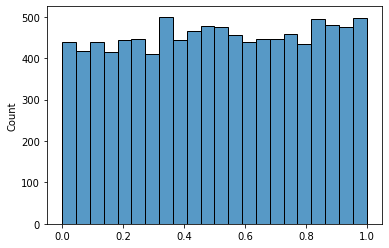

In [131]:
pvalue=[]
for p in range(10000):
    df1 = df[df.exp_group == 2].sample(500, replace=False)
    df2 = df[df.exp_group == 3].sample(500, replace=False)
    stast, p = stats.ttest_ind(df1[df1.exp_group == 2].ctr,
    df2[df2.exp_group == 3].ctr, equal_var=False)
    pvalue.append(p)
sns.histplot(pvalue)

In [121]:
pvalue

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
